In [1]:
# Define DataFrames
custinvoicetrans_df = spark.table("custinvoicetrans")
custinvoicejour_df = spark.table("custinvoicejour")
acxcustinvoicejour_df = spark.table("acxcustinvoicejour")
custtable_df = spark.table("custtable")
acxcusttable_df = spark.table("acxcusttable")
inventtable_df = spark.table("inventtable")
acxinventtable_df = spark.table("acxinventtable")
acxbrandcategorytable_df = spark.table("acxbrandcategrorytable")
inventdim_df = spark.table("inventdim")
acxproductsegmenttable_df = spark.table("acxproductsegmenttable")
inventitemgroupitem_df = spark.table("inventitemgroupitem")
inventitemgroup_df = spark.table("inventitemgroup")
taxwithholdtrans_in_df = spark.table("taxwithholdtrans_in")
dirpartylocation_df = spark.table("dirpartylocation")
logisticspostaladdress_df = spark.table("logisticspostaladdress")
inventbatch_df = spark.table("inventbatch")
inventserial_df = spark.table("inventserial")
acxsaleshierarchytable_df = spark.table("acxsaleshierarchytable")
inventsite_df = spark.table("inventsite")
# inventsitelogisticslocation_df = spark.table("inventsitelogisticslocation")
logisticspostaladdress_df = spark.table("logisticspostaladdress")
markuptrans_df = spark.table("markuptrans")
acxchanneltable_df = spark.table("acxchanneltable")
acxsubchanneltable_df = spark.table("acxsubchanneltable")
acxdistributorretailertable_df = spark.table("acxdistributorretailertable")
acxpacksizetable_df = spark.table("acxpacksizetable")
acxpacktypetable_df = spark.table("acxpacktypetable")
hcmworker_df = spark.table("hcmworker")
dirpartytable_df = spark.table("dirpartytable")
acxareatypetable_df = spark.table("acxareatypetable")
acxcustomerareatypetable_df = spark.table("acxcustomerareatypetable")
#acxtransportertable_df = spark.table("acxtransportertable")
adt_df = spark.table("acxdistributorretailertable")
custgroup_df = spark.table("custgroup")
acxccicustgroup_df = spark.table("acxccicustgroup")
acxareatypetable_df = spark.table("acxareatypetable")
acxcustomerareatypetable_df = spark.table("acxcustomerareatypetable")
#acxtransportertable_df = spark.table("acxtransportertable")
hsncodetable_in_df = spark.table("hsncodetable_in")

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 3, Finished, Available, Finished)

In [2]:
from pyspark.sql.functions import col, when

# Aliasing DataFrames for ease of use
cit = custinvoicetrans_df.alias("cit")
cij = custinvoicejour_df.alias("cij")
ct = custtable_df.alias("ct")
ait = acxinventtable_df.alias("ait")
iigi = inventitemgroupitem_df.alias("iigi")
iig = inventitemgroup_df.alias("iig")
id_df = inventdim_df.alias("id")
it = inventtable_df.alias("it")

# Join and select specific fields
converted_df = cit.join(cij, (cit["invoiceid"] == cij["invoiceid"]) & (cit["dataareaid"] == cij["dataareaid"]), "inner") \
    .join(ct, (ct["accountnum"] == cij["invoiceaccount"]) & (ct["dataareaid"] == cij["dataareaid"]), "left") \
    .join(ait, (ait["itemid"] == cit["itemid"]) & (ait["dataareaid"] == cit["dataareaid"]), "left") \
    .join(iigi, (iigi["itemid"] == cit["itemid"]) & (iigi["itemdataareaid"] == cit["dataareaid"]), "left") \
    .join(iig, (iig["itemgroupid"] == iigi["itemgroupid"]) & (iig["dataareaid"] == iigi["itemdataareaid"]), "left") \
    .join(id_df, (id_df["inventdimid"] == cit["inventdimid"]) & (id_df["dataareaid"] == cit["dataareaid"]), "left") \
    .join(it, (it["itemid"] == cit["itemid"]) & (it["dataareaid"] == cit["dataareaid"]), "left") \
    .select(
        col("cit.qty").alias("BASEQUANTITY"),
        col("cit.qty").alias("QUANTITY"),
        col("ait.brandcategory").alias("BRANDCATEGORY"),
        col("ait.brand").alias("BRANDCODE"),
        col("ait.brand").alias("BRANDNAME"),
        col("ct.custgroup").alias("CUSTOMERGROUP"),
        col("cij.invoiceaccount").alias("CUSTOMERNO"),
        when(col("cit.qty") > 0, "Sales").otherwise("Sale Return").alias("DOCUMENTTYPE"),
        col("cij.invoiceid").alias("INVOICEID"),
        col("cit.itemid").alias("ITEMID"),
        col("ait.itemname").alias("ITEMNAME"),
        (col("cit.qty") * col("cit.salesprice")).alias("LINEAMOUNT"),
        col("cit.linedisc").alias("LINEDISCOUNT"),
        col("ait.conversionfactor").alias("NOOFBOTTLES"),
        col("cit.invoicedate").alias("POSTINGDATE"),
        col("cit.salesid").alias("SALESID"),
        (col("cit.qty") * col("cit.linedisc")).alias("SCHEMEDISCOUNT"),
        col("cit.salesprice").alias("UNITPRICE"),
        when(col("ait.cciitemtype") == 2, "FG").otherwise("None").alias("CCIITEMTYPESTR"),
        col("ait.cciitemtype").alias("CCIItemType"),
        col("cit.dataareaid").alias("DATAAREAID"),
        (col("ait.uncs") * col("cit.qty")).alias("UNCS"),
        when(col("it.acxitemtype") == 1, "Finish Goods").otherwise("None").alias("ITEMTYPE"),
        col("id.inventsiteid").alias("SITEID"),
        col("iigi.itemgroupid").alias("ITEMGROUPID"),
        col("ait.legacycode").alias("JaguarItemCode_Legacy")
    )

converted_df.show(5, truncate=False)


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 4, Finished, Available, Finished)

+------------+----------+-------------+---------+---------+-------------+----------+------------+---------------+----------+---------------------------+------------+------------+-------------------+-------------------+----------------+--------------+----------+--------------+-----------+----------+----------+------------+------+-----------+---------------------+
|BASEQUANTITY|QUANTITY  |BRANDCATEGORY|BRANDCODE|BRANDNAME|CUSTOMERGROUP|CUSTOMERNO|DOCUMENTTYPE|INVOICEID      |ITEMID    |ITEMNAME                   |LINEAMOUNT  |LINEDISCOUNT|NOOFBOTTLES        |POSTINGDATE        |SALESID         |SCHEMEDISCOUNT|UNITPRICE |CCIITEMTYPESTR|CCIItemType|DATAAREAID|UNCS      |ITEMTYPE    |SITEID|ITEMGROUPID|JaguarItemCode_Legacy|
+------------+----------+-------------+---------+---------+-------------+----------+------------+---------------+----------+---------------------------+------------+------------+-------------------+-------------------+----------------+--------------+----------+---------

In [3]:
converted_df.show()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 5, Finished, Available, Finished)

+------------+----------+-------------+---------+---------+-------------+----------+------------+----------------+----------+--------------------+------------+------------+-------------------+-------------------+----------------+--------------+----------+--------------+-----------+----------+----------+------------+------+-----------+---------------------+
|BASEQUANTITY|  QUANTITY|BRANDCATEGORY|BRANDCODE|BRANDNAME|CUSTOMERGROUP|CUSTOMERNO|DOCUMENTTYPE|       INVOICEID|    ITEMID|            ITEMNAME|  LINEAMOUNT|LINEDISCOUNT|        NOOFBOTTLES|        POSTINGDATE|         SALESID|SCHEMEDISCOUNT| UNITPRICE|CCIITEMTYPESTR|CCIItemType|DATAAREAID|      UNCS|    ITEMTYPE|SITEID|ITEMGROUPID|JaguarItemCode_Legacy|
+------------+----------+-------------+---------+---------+-------------+----------+------------+----------------+----------+--------------------+------------+------------+-------------------+-------------------+----------------+--------------+----------+--------------+-----------+

In [4]:
# Convert PySpark DataFrame to Pandas DataFrame
converted_pd_df = converted_df.toPandas()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 6, Finished, Available, Finished)

In [5]:
converted_pd_df.info()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 7, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859050 entries, 0 to 4859049
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   BASEQUANTITY           object        
 1   QUANTITY               object        
 2   BRANDCATEGORY          object        
 3   BRANDCODE              object        
 4   BRANDNAME              object        
 5   CUSTOMERGROUP          object        
 6   CUSTOMERNO             object        
 7   DOCUMENTTYPE           object        
 8   INVOICEID              object        
 9   ITEMID                 object        
 10  ITEMNAME               object        
 11  LINEAMOUNT             object        
 12  LINEDISCOUNT           object        
 13  NOOFBOTTLES            object        
 14  POSTINGDATE            datetime64[us]
 15  SALESID                object        
 16  SCHEMEDISCOUNT         object        
 17  UNITPRICE              object        
 18  CCIITEMTYPESTR        

In [6]:
from pyspark.sql.functions import min, max


converted_df.select(
    min("POSTINGDATE").alias("MinPostingDate"),
    max("POSTINGDATE").alias("MaxPostingDate")
).show()


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 8, Finished, Available, Finished)

+-------------------+-------------------+
|     MinPostingDate|     MaxPostingDate|
+-------------------+-------------------+
|2020-01-06 00:00:00|2025-11-05 00:00:00|
+-------------------+-------------------+



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 9, Finished, Available, Finished)

In [8]:
df = converted_pd_df.copy()
df["ds"] = pd.to_datetime(df["POSTINGDATE"]).dt.floor("D")
daily = (
    df.groupby("ds")["BASEQUANTITY"]
      .sum()
      .reset_index(name="y")
      .sort_values("ds")
      .set_index("ds")
)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 10, Finished, Available, Finished)

In [9]:
holdout_days = 90
split_date    = daily.index.max() - pd.Timedelta(days=holdout_days)
train_daily   = daily.loc[:split_date].copy()
test_daily    = daily.loc[split_date + pd.Timedelta(days=1):].copy()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 11, Finished, Available, Finished)

In [10]:
def make_features(df):
    df = df.copy()
    df["lag1"]   = df["y"].shift(1)
    df["lag7"]   = df["y"].shift(7)
    df["roll7"]  = df["y"].rolling(7).mean()
    df["dow"]    = df.index.dayofweek
    df["month"]  = df.index.month
    df["day"]    = df.index.day
    return df.dropna()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 12, Finished, Available, Finished)

In [11]:
converted_pd_df[[
    "BASEQUANTITY", "QUANTITY", "LINEAMOUNT", "LINEDISCOUNT",
    "SCHEMEDISCOUNT", "UNITPRICE", "NOOFBOTTLES", "UNCS"
]] = converted_pd_df[[
    "BASEQUANTITY", "QUANTITY", "LINEAMOUNT", "LINEDISCOUNT",
    "SCHEMEDISCOUNT", "UNITPRICE", "NOOFBOTTLES", "UNCS"
]].apply(pd.to_numeric)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 13, Finished, Available, Finished)

In [12]:
converted_pd_df.info()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 14, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859050 entries, 0 to 4859049
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   BASEQUANTITY           float64       
 1   QUANTITY               float64       
 2   BRANDCATEGORY          object        
 3   BRANDCODE              object        
 4   BRANDNAME              object        
 5   CUSTOMERGROUP          object        
 6   CUSTOMERNO             object        
 7   DOCUMENTTYPE           object        
 8   INVOICEID              object        
 9   ITEMID                 object        
 10  ITEMNAME               object        
 11  LINEAMOUNT             float64       
 12  LINEDISCOUNT           float64       
 13  NOOFBOTTLES            float64       
 14  POSTINGDATE            datetime64[us]
 15  SALESID                object        
 16  SCHEMEDISCOUNT         float64       
 17  UNITPRICE              float64       
 18  CCIITEMTYPESTR        

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 15, Finished, Available, Finished)

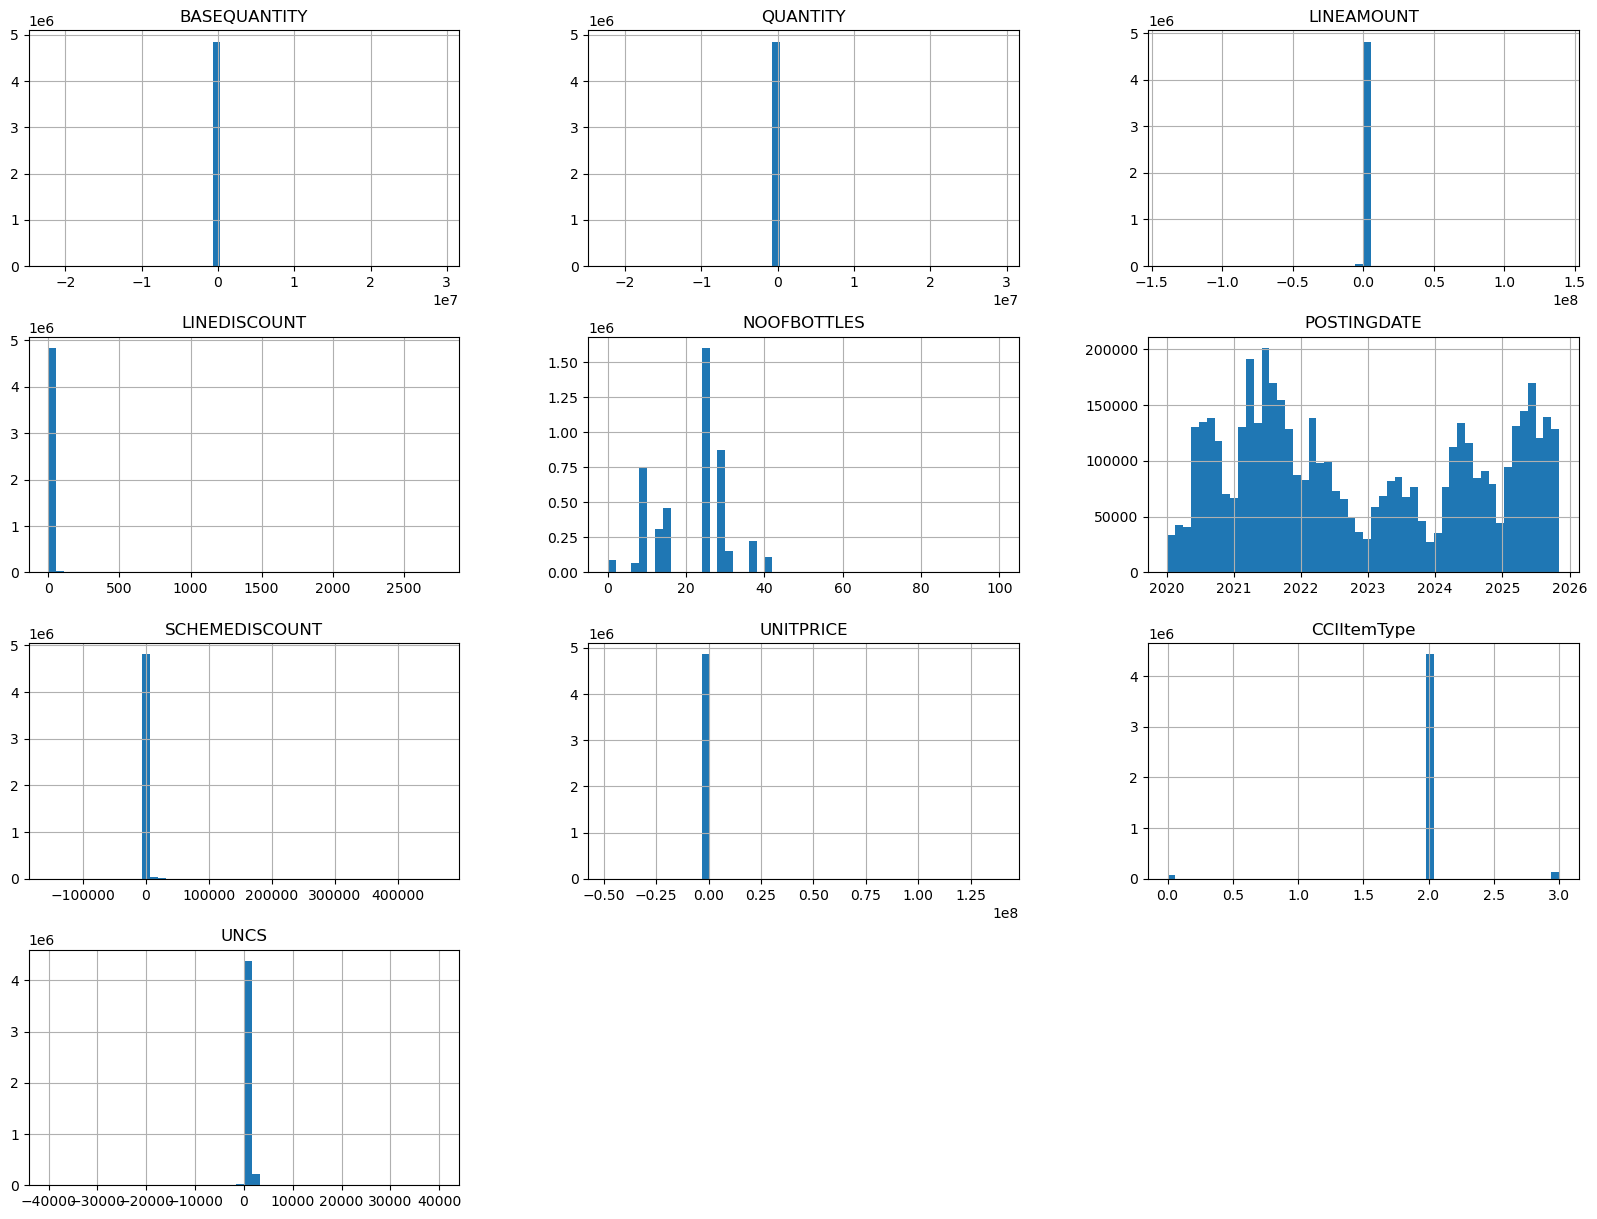

In [13]:
#import matplotlib.pyplot as plt
converted_pd_df.hist(bins=50, figsize=(20,15))
plt.show()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 16, Finished, Available, Finished)

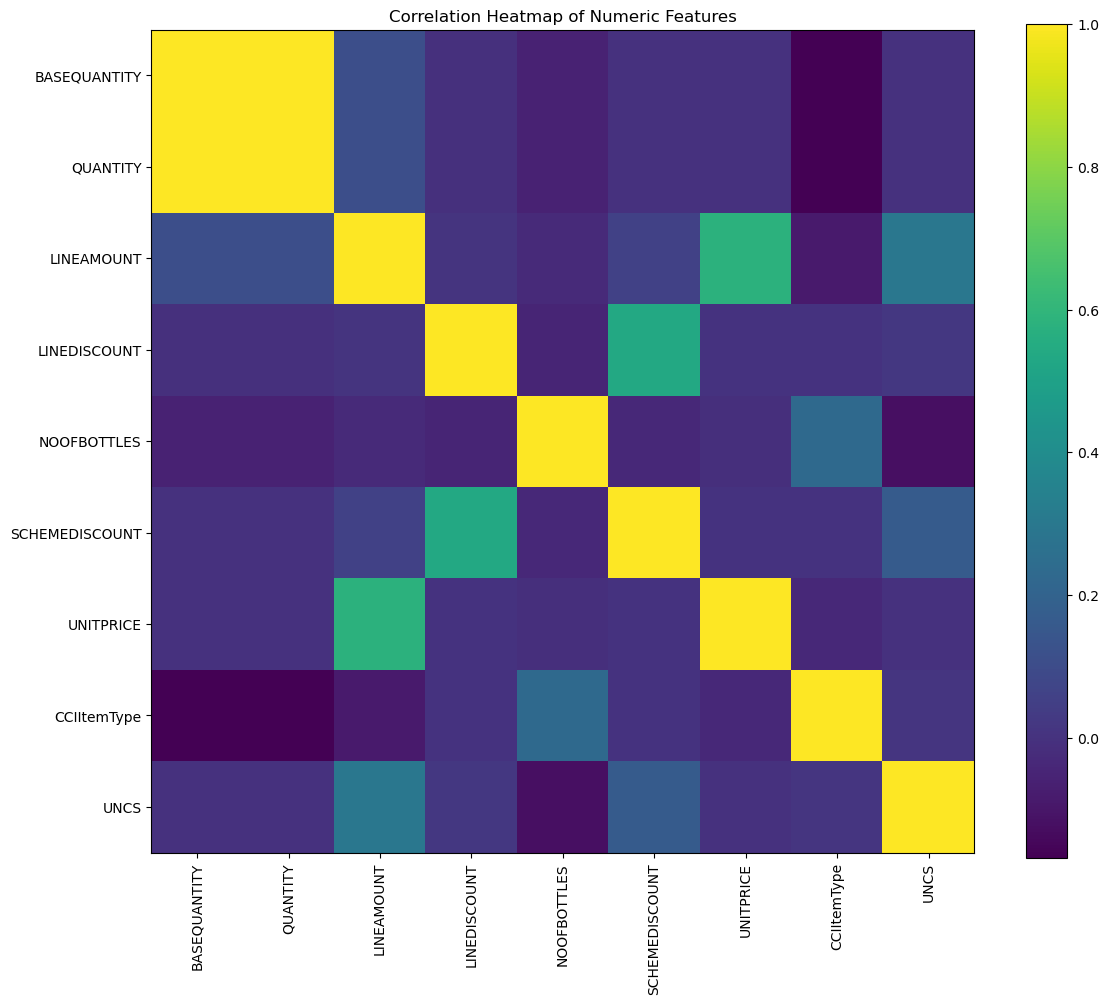

In [14]:
df_numeric = converted_pd_df.select_dtypes(include=['number']).copy()

corr = df_numeric.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr, interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


In [15]:
# Get unique values from the 'category' column
df = converted_pd_df
unique_values = df['CCIItemType'].unique()

print(unique_values)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 17, Finished, Available, Finished)

[ 2.  0.  3. nan]


In [16]:
df = converted_pd_df
unique_values = df['BRANDNAME'].unique()

print(unique_values)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 18, Finished, Available, Finished)

['FX' 'KW' 'KO' None 'MZ' 'SP' 'LX' 'TU' 'MM' 'CZ' 'SWP' 'KS' 'MMNF' 'DC'
 'CO2' 'RANI' 'AP' 'MON' 'KWP' 'MMPO' 'SW' 'CH' 'SPO' 'DSW' 'PR' 'RZM'
 'HT' 'VW' 'GI']


In [17]:
df = converted_pd_df
unique_values = df['BRANDCATEGORY'].unique()

print(unique_values)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 19, Finished, Available, Finished)

['BC06' 'BC05' 'BC01' None 'BC04' 'BC39' 'BC02' 'BC31' 'BC15' 'BC42'
 'BC37' 'BC10' 'BC03' 'BC09' 'BC34' 'BC47' 'BC11' 'BC30' 'BC45' 'BC43'
 'BC20' 'BC07' 'BC40' 'BC17' 'BC21' 'BC46' 'BC44' 'BC49' 'BC13' 'BC50'
 'BC41' 'BC29' 'BC16' 'BC33' 'BC26' 'BC27' 'BC23' 'BC25' 'BC22' 'BC28'
 'BC19' 'BC18' 'BC36' 'BC55' 'BC54' 'BC38' 'BC53' 'BC52' 'BC56' 'BC32']


In [18]:
df = converted_pd_df
unique_values = df['BRANDCODE'].unique()

print(unique_values)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 20, Finished, Available, Finished)

['FX' 'KW' 'KO' None 'MZ' 'SP' 'LX' 'TU' 'MM' 'CZ' 'SWP' 'KS' 'MMNF' 'DC'
 'CO2' 'RANI' 'AP' 'MON' 'KWP' 'MMPO' 'SW' 'CH' 'SPO' 'DSW' 'PR' 'RZM'
 'HT' 'VW' 'GI']


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 21, Finished, Available, Finished)

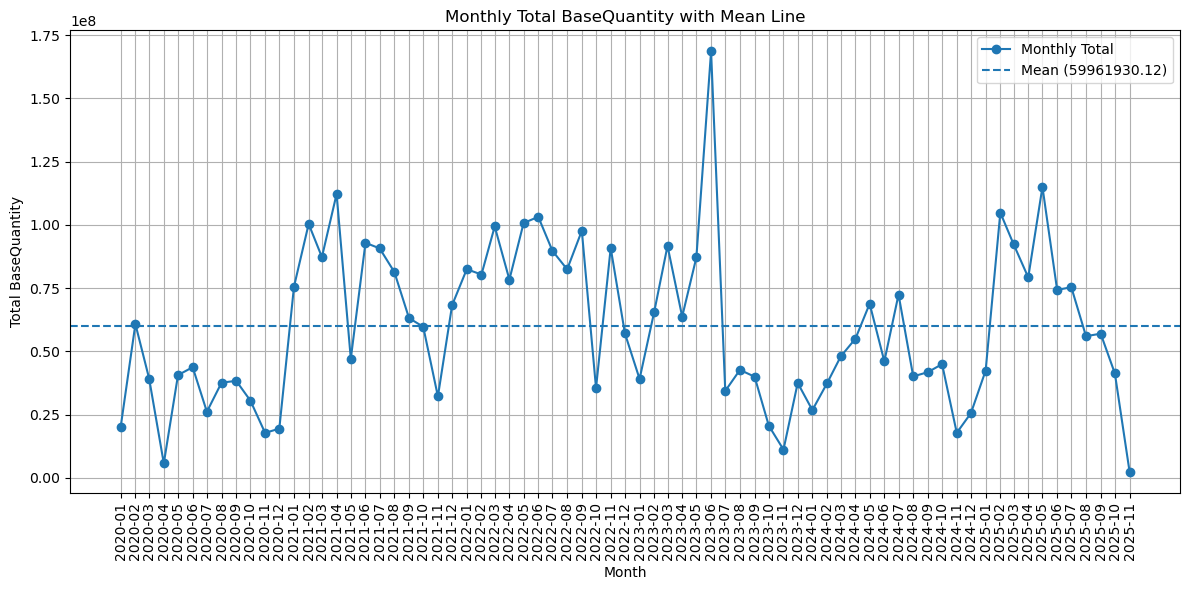

In [19]:
converted_pd_df["YearMonth"] = pd.to_datetime(converted_pd_df["POSTINGDATE"]) \
                                 .dt.to_period("M") \
                                 .dt.to_timestamp()
monthly = (
    converted_pd_df.groupby("YearMonth")["BASEQUANTITY"]
                    .sum()
                    .reset_index(name="TotalBaseQuantity")
                    .sort_values("YearMonth")
)

# 2. Compute mean of monthly totals
mean_sales = monthly["TotalBaseQuantity"].mean()

# 3. Plot line chart with mean line
plt.figure(figsize=(12, 6))
plt.plot(monthly["YearMonth"], monthly["TotalBaseQuantity"],
         marker='o', label="Monthly Total")
plt.axhline(mean_sales, linestyle='--', label=f"Mean ({mean_sales:.2f})")
plt.xlabel("Month")
plt.ylabel("Total BaseQuantity")
plt.title("Monthly Total BaseQuantity with Mean Line")
plt.xticks(monthly["YearMonth"],
           monthly["YearMonth"].dt.strftime("%Y-%m"),
           rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 22, Finished, Available, Finished)

In [21]:
df = converted_pd_df.copy()
df["POSTINGDATE"] = pd.to_datetime(df["POSTINGDATE"])
df["BASEQUANTITY"] = pd.to_numeric(df["BASEQUANTITY"], errors='coerce')
df = df.dropna(subset=["BASEQUANTITY"])

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 23, Finished, Available, Finished)

In [22]:
Q1 = df["BASEQUANTITY"].quantile(0.25)
Q3 = df["BASEQUANTITY"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["BASEQUANTITY"] >= lower_bound) & (df["BASEQUANTITY"] <= upper_bound)]

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 24, Finished, Available, Finished)

In [23]:
daily_df = df.groupby("POSTINGDATE")["BASEQUANTITY"].sum().reset_index()
daily_df = daily_df.set_index("POSTINGDATE").asfreq("D").fillna(0)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 25, Finished, Available, Finished)

In [24]:
train = daily_df[: -90]
test = daily_df[-90:]

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 26, Finished, Available, Finished)

In [25]:
x_train = np.arange(len(train)).reshape(-1, 1)
y_train = train["BASEQUANTITY"].values
x_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.9)
xgb_model.fit(x_train, y_train)
pred_xgb_daily = xgb_model.predict(x_test)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 27, Finished, Available, Finished)

In [26]:
sar_model = SARIMAX(train["BASEQUANTITY"], order=(1,1,1), seasonal_order=(1,1,1,7))
sar_res = sar_model.fit(disp=False)
pred_sar_daily = sar_res.predict(start=len(train), end=len(train)+len(test)-1)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 28, Finished, Available, Finished)

In [27]:
def aggregate_monthly(index, values, label):
    df = pd.DataFrame({label: values}, index=index)
    df["YearMonth"] = df.index.to_period("M")
    return df.groupby("YearMonth").sum()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 29, Finished, Available, Finished)

In [28]:
actual_monthly = aggregate_monthly(test.index, test["BASEQUANTITY"].values, "y_actual")["y_actual"]
xgb_monthly = aggregate_monthly(test.index, pred_xgb_daily, "y_pred_xgb")
sar_monthly = aggregate_monthly(test.index, pred_sar_daily, "y_pred_sar")

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 30, Finished, Available, Finished)

In [29]:
monthly_df = pd.concat([actual_monthly, xgb_monthly, sar_monthly], axis=1).dropna()
from sklearn.metrics import mean_squared_error
rmse_xgb = mean_squared_error(
    monthly_df["y_actual"],
    monthly_df["y_pred_xgb"],
    squared=False
)
rmse_sar = mean_squared_error(
    monthly_df["y_actual"],
    monthly_df["y_pred_sar"],
    squared=False
)

print(f"RMSE XGBoost Monthly: {rmse_xgb:,.4f}")
print(f"RMSE SARIMAX Monthly:  {rmse_sar:,.4f}")

r2_xgb = r2_score(monthly_df["y_actual"], monthly_df["y_pred_xgb"])
r2_sar = r2_score(monthly_df["y_actual"], monthly_df["y_pred_sar"])

print("R2 XGBoost Monthly:", r2_xgb)
print("R2 SARIMAX Monthly:", r2_sar)
print(xgb_monthly)
print(sar_monthly)
print(actual_monthly)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 31, Finished, Available, Finished)

RMSE XGBoost Monthly: 215,519.3765
RMSE SARIMAX Monthly:  310,459.3711
R2 XGBoost Monthly: 0.9818248404736178
R2 SARIMAX Monthly: 0.9622849112093598
            y_pred_xgb
YearMonth             
2025-08    3530836.000
2025-09    4413545.000
2025-10    4560663.500
2025-11     735590.875
             y_pred_sar
YearMonth              
2025-08    3.575173e+06
2025-09    4.497750e+06
2025-10    4.778703e+06
2025-11    7.468015e+05
YearMonth
2025-08    3.590298e+06
2025-09    4.371935e+06
2025-10    4.251663e+06
2025-11    4.439650e+05
Freq: M, Name: y_actual, dtype: float64


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 32, Finished, Available, Finished)

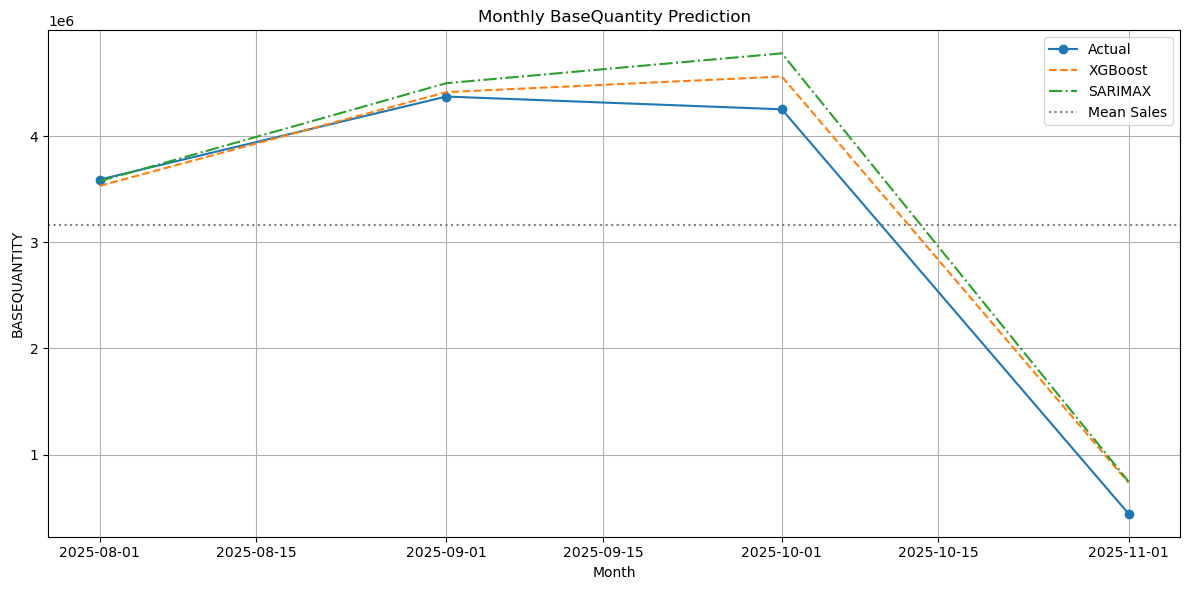

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index.to_timestamp(), monthly_df["y_actual"], label="Actual", marker='o')
plt.plot(monthly_df.index.to_timestamp(), monthly_df["y_pred_xgb"], label="XGBoost", linestyle="--")
plt.plot(monthly_df.index.to_timestamp(), monthly_df["y_pred_sar"], label="SARIMAX", linestyle="-.")
plt.axhline(monthly_df["y_actual"].mean(), color='gray', linestyle=':', label='Mean Sales')
plt.title("Monthly BaseQuantity Prediction")
plt.xlabel("Month")
plt.ylabel("BASEQUANTITY")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
df['POSTINGDATE'] = pd.to_datetime(df['POSTINGDATE'])
df = df.sort_values('POSTINGDATE')
df = df.set_index('POSTINGDATE')

y_daily = df['BASEQUANTITY'].resample('D').sum()


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 33, Finished, Available, Finished)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

full_model = SARIMAX(y_daily, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)) 
full_model_fit = full_model.fit(disp=False)


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 34, Finished, Available, Finished)

In [33]:
forecast_steps = 61  
future_pred = full_model_fit.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=y_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

future_df = pd.DataFrame({"y_pred_sar": future_pred}, index=future_dates)


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 35, Finished, Available, Finished)

In [34]:
future_df["YearMonth"] = future_df.index.to_period("M")

future_monthly_pred = future_df.groupby("YearMonth").sum()
print(future_monthly_pred)
print(actual_monthly)
print(sar_monthly)


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 36, Finished, Available, Finished)

             y_pred_sar
YearMonth              
2025-11    2.361532e+06
2025-12    2.571530e+06
2026-01    3.629702e+05
YearMonth
2025-08    3.590298e+06
2025-09    4.371935e+06
2025-10    4.251663e+06
2025-11    4.439650e+05
Freq: M, Name: y_actual, dtype: float64
             y_pred_sar
YearMonth              
2025-08    3.575173e+06
2025-09    4.497750e+06
2025-10    4.778703e+06
2025-11    7.468015e+05


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 37, Finished, Available, Finished)

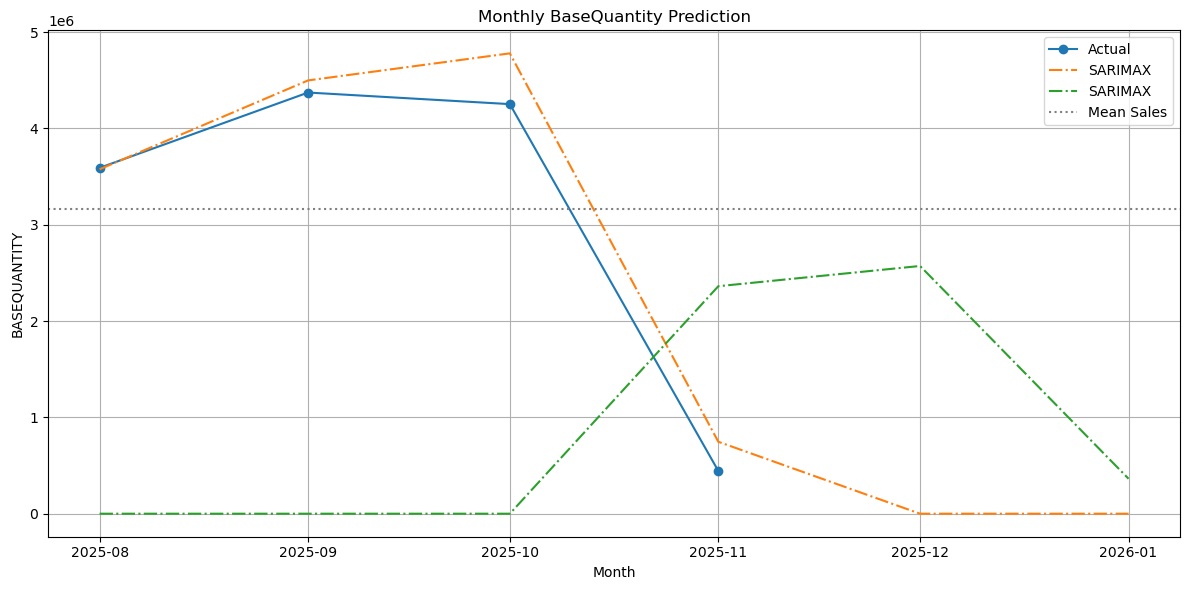

In [35]:
new_sar=pd.concat([sar_monthly, future_monthly_pred], axis=1)
combined_sar = new_sar.groupby("YearMonth")["y_pred_sar"].sum()
monthly_df = pd.concat([actual_monthly, combined_sar], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index.to_timestamp(), monthly_df["y_actual"], label="Actual", marker='o')
plt.plot(monthly_df.index.to_timestamp(), monthly_df["y_pred_sar"], label="SARIMAX", linestyle="-.")
#plt.plot(monthly_df.index.to_timestamp(), monthly_df["yy_pred_sar"], label="SARIMAX_future", linestyle="-.")
plt.axhline(monthly_df["y_actual"].mean(), color='gray', linestyle=':', label='Mean Sales')
plt.title("Monthly BaseQuantity Prediction")
plt.xlabel("Month")
plt.ylabel("BASEQUANTITY")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 38, Finished, Available, Finished)

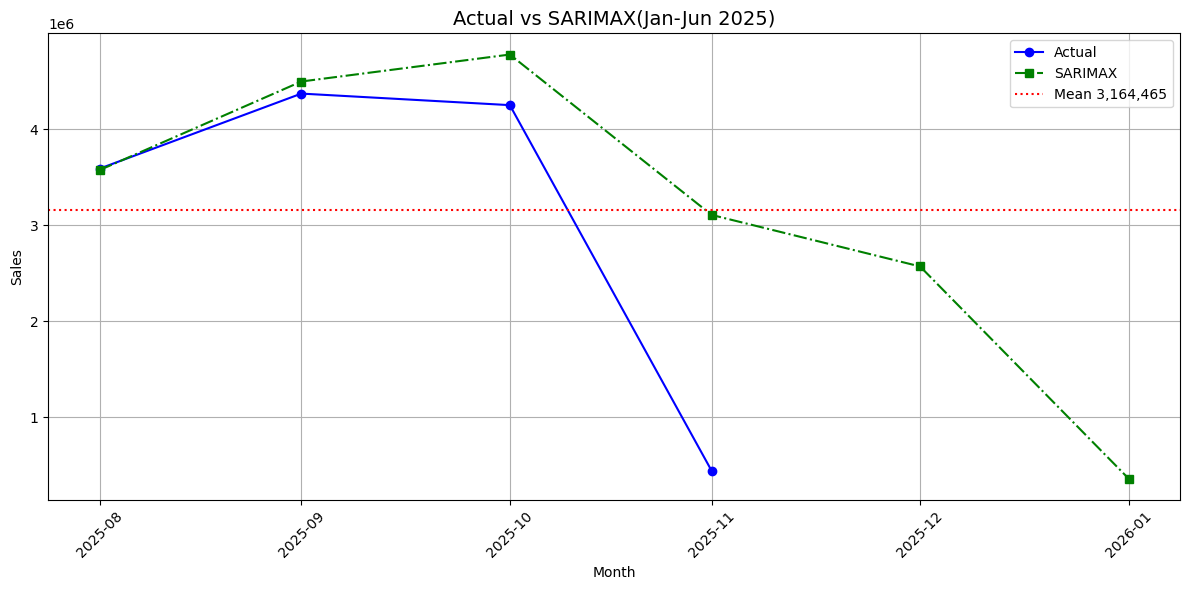

In [36]:
hist = sar_monthly.copy()
if isinstance(hist, pd.DataFrame):
    hist = hist["y_pred_sar"]
if isinstance(hist.index, pd.DatetimeIndex):
    hist.index = hist.index.to_period("M")
hist.name = "hist_pred"
fut = future_monthly_pred["y_pred_sar"].copy()
if isinstance(fut.index, pd.DatetimeIndex):
    fut.index = fut.index.to_period("M")
fut.name = "future_pred"
df_sar = pd.concat([hist, fut], axis=1).fillna(0)
df_sar["combined_pred"] = df_sar["hist_pred"] + df_sar["future_pred"]
act = actual_monthly.copy()
if isinstance(act.index, pd.DatetimeIndex):
    act.index = act.index.to_period("M")
act.name = "actual"
plot_idx = pd.period_range(start=act.index.min(), end=df_sar.index.max(), freq="M")
plot_df = pd.DataFrame(index=plot_idx)
plot_df["Actual"]         = act
plot_df["SARIMAX predictions"]   = df_sar["combined_pred"]

x = plot_df.index.to_timestamp(how="end")

plt.figure(figsize=(12, 6))
plt.plot(x, plot_df["Actual"], marker="o", linestyle="-",  color="blue",   label="Actual")
plt.plot(x, plot_df["SARIMAX predictions"], marker="s", linestyle="-.",  color="green",    label="SARIMAX")

mean_val = plot_df["Actual"].mean()
plt.axhline(mean_val, color="red", linestyle=":", label=f"Mean {mean_val:,.0f}")

plt.title("Actual vs SARIMAX(Jan-Jun 2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(x, [d.strftime("%Y-%m") for d in x], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
print(df_sar["combined_pred"])
print(actual_monthly)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 39, Finished, Available, Finished)

YearMonth
2025-08    3.575173e+06
2025-09    4.497750e+06
2025-10    4.778703e+06
2025-11    3.108334e+06
2025-12    2.571530e+06
2026-01    3.629702e+05
Freq: M, Name: combined_pred, dtype: float64
YearMonth
2025-08    3.590298e+06
2025-09    4.371935e+06
2025-10    4.251663e+06
2025-11    4.439650e+05
Freq: M, Name: y_actual, dtype: float64


In [38]:
df_sar['combined_pred']=df_sar['combined_pred']/1e7
actual_monthly=actual_monthly/1e7

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 40, Finished, Available, Finished)

In [39]:
print("SARIMAX predictions in crores: ")
print(df_sar['combined_pred'])
print("Actual values in crores: ")
print(actual_monthly)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 41, Finished, Available, Finished)

SARIMAX predictions in crores: 
YearMonth
2025-08    0.357517
2025-09    0.449775
2025-10    0.477870
2025-11    0.310833
2025-12    0.257153
2026-01    0.036297
Freq: M, Name: combined_pred, dtype: float64
Actual values in crores: 
YearMonth
2025-08    0.359030
2025-09    0.437193
2025-10    0.425166
2025-11    0.044396
Freq: M, Name: y_actual, dtype: float64


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 42, Finished, Available, Finished)

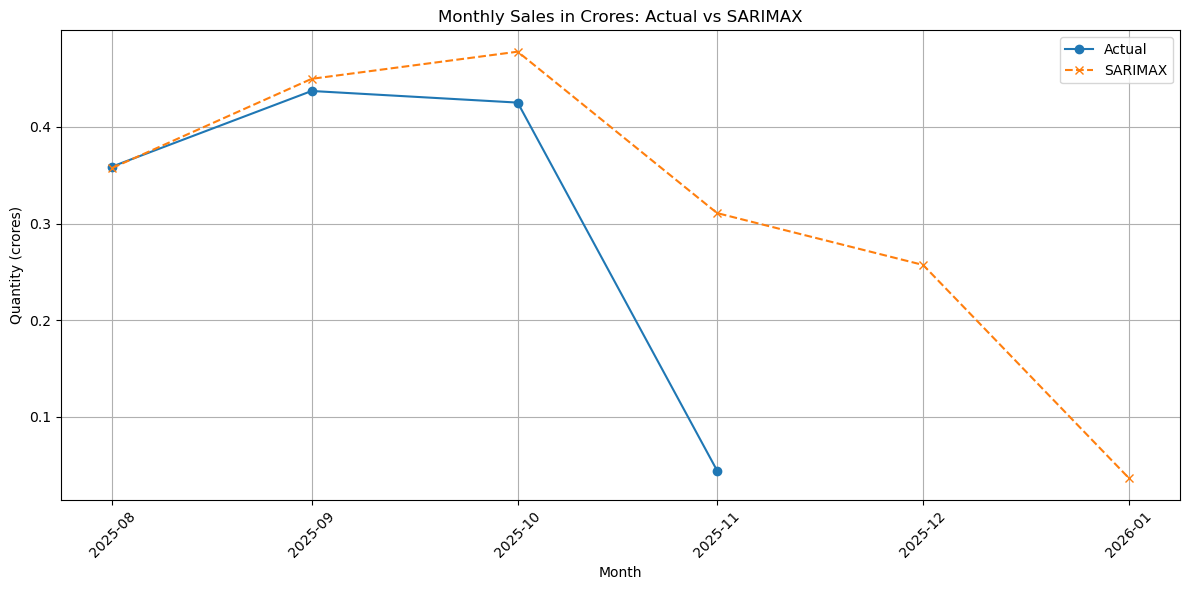

In [40]:
plot__df = pd.concat([
    actual_monthly.rename('Actual (crores)'),
    df_sar['combined_pred'].rename('SARIMAX (crores)')
], axis=1)

x = plot__df.index.to_timestamp(how='end')


plt.figure(figsize=(12, 6))
plt.plot(x, plot__df['Actual (crores)'], marker='o', label='Actual')
plt.plot(x, plot__df['SARIMAX (crores)'], marker='x', linestyle='--', label='SARIMAX')
plt.title('Monthly Sales in Crores: Actual vs SARIMAX')
plt.xlabel('Month')
plt.ylabel('Quantity (crores)')
plt.xticks(x, [d.strftime('%Y-%m') for d in x], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
df_sar['combined_pred']=df_sar['combined_pred']*1e2
actual_monthly=actual_monthly*1e2

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 43, Finished, Available, Finished)

In [42]:
print("SARIMAX predictions in lakhs: ")
print(df_sar['combined_pred'])
print("Actual values in lakhs: ")
print(actual_monthly)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 44, Finished, Available, Finished)

SARIMAX predictions in lakhs: 
YearMonth
2025-08    35.751732
2025-09    44.977500
2025-10    47.787033
2025-11    31.083336
2025-12    25.715298
2026-01     3.629702
Freq: M, Name: combined_pred, dtype: float64
Actual values in lakhs: 
YearMonth
2025-08    35.902984
2025-09    43.719347
2025-10    42.516626
2025-11     4.439650
Freq: M, Name: y_actual, dtype: float64


StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 45, Finished, Available, Finished)

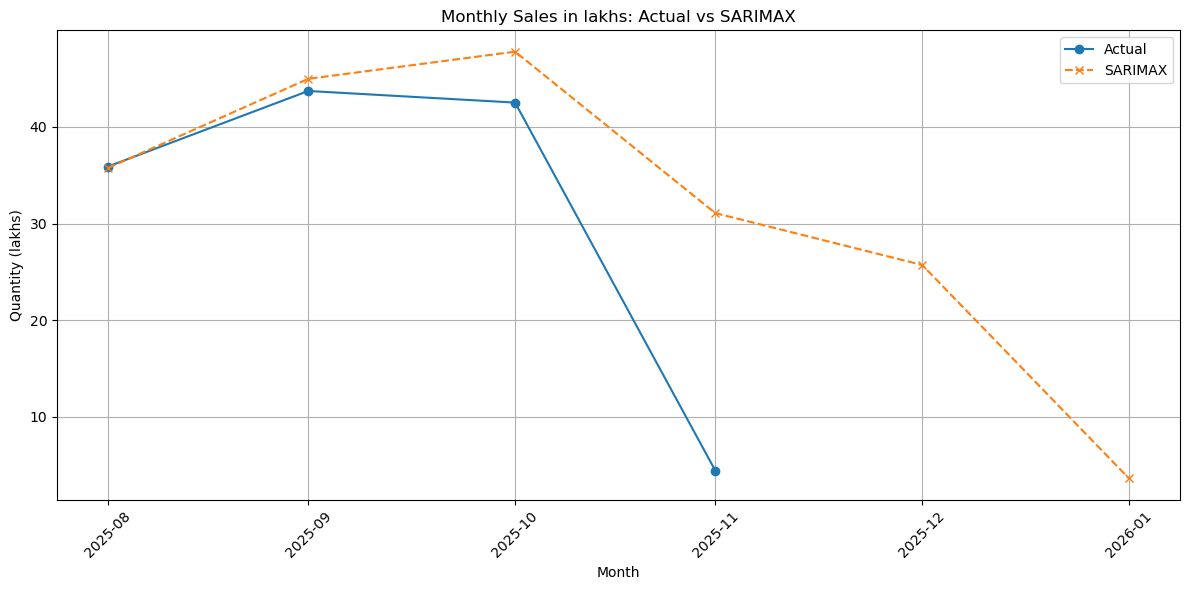

In [43]:
plot__data = pd.concat([
    actual_monthly.rename('Actual (lakhs)'),
    df_sar['combined_pred'].rename('SARIMAX (lakhs)')
], axis=1)

x = plot__data.index.to_timestamp(how='end')


plt.figure(figsize=(12, 6))
plt.plot(x, plot__data['Actual (lakhs)'], marker='o', label='Actual')
plt.plot(x, plot__data['SARIMAX (lakhs)'], marker='x', linestyle='--', label='SARIMAX')
plt.title('Monthly Sales in lakhs: Actual vs SARIMAX')
plt.xlabel('Month')
plt.ylabel('Quantity (lakhs)')
plt.xticks(x, [d.strftime('%Y-%m') for d in x], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
y_actual = monthly_df["y_actual"]
y_log = np.log1p(y_actual)
display(y_log)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 46, Finished, Available, Finished)

YearMonth
2025-08    15.093746
2025-09    15.290716
2025-10    15.262821
2025-11    13.003503
2025-12          NaN
2026-01          NaN
Freq: M, Name: y_actual, dtype: float64

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df_model = monthly_df.dropna(subset=['y_actual']).copy()

df_model['month'] = df_model.index.month
df_model['year'] = df_model.index.year

X = df_model[['month', 'year']]
y = df_model['y_actual']

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 47, Finished, Available, Finished)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=False  # time-series style split
)

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 48, Finished, Available, Finished)

In [47]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model_xgb.fit(X_train, np.log1p(y_train))

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 49, Finished, Available, Finished)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict and reverse the log transform
y_pred_log = model_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (XGBoost log-corrected): {rmse:,.2f}")
print(f"R2 Score: {r2}")

StatementMeta(, 167817ab-b340-45bf-a191-22570b444ea1, 50, Finished, Available, Finished)

RMSE (XGBoost log-corrected): 2,775,700.26
R2 Score: -1.1255934975055566
